In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the provided data
data_df = pd.read_csv('laggedchoice_data_car_driver_choices_cleaned.csv')
data_df.head()

,driver_tag,time_tag,dist_ahead,time_of_impact,num_of_det_vehicles,veh_flag,gps_speed,overspeeding,min_age,max_age,...,alpha_42,alpha_43,alpha_51,alpha_52,alpha_53,alpha_61,alpha_63,is_aggressive,is_drowsy,is_normal
0,11,0,-1.0,-1.0,0,0,65.033333,0,40,50,...,0,0,0,0,0,0,0,0,0,1
1,11,1,-1.0,-1.0,0,0,68.633333,0,40,50,...,0,0,0,0,0,0,0,0,0,1
2,11,2,-1.0,-1.0,0,0,71.222222,0,40,50,...,0,0,0,0,0,0,0,0,0,1
3,11,3,-1.0,-1.0,0,0,74.344444,0,40,50,...,0,0,0,0,0,0,0,0,0,1
4,11,4,-1.0,-1.0,0,0,77.111111,0,40,50,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# Compute the time_to_impact
data_df['time_to_impact'] = (data_df['dist_ahead'] / data_df['gps_speed']) * data_df['veh_flag']

In [4]:
# Filter data for driver tags 31, 32, and 33
filtered_df = data_df[data_df['driver_tag'].isin([31, 32, 33])]

In [5]:
# Compute utility values for "Acc" and "Brk"

# Coefficients provided by the user
coefficients = {
    'asc_acc': -1.2296,
    'asc_brk': -0.9823,
    'nodv_acc': 0.5427,
    'nodv_brk': 0.1425,
    'dist_acc': 0.0020,
    'dist_brk': 0.0631,
    'time_to_impact_acc': -0.4476,
    'time_to_impact_brk': -6.0091,
    'is_drowsy_acc': 0.0955,
    'is_drowsy_brk': 0.0071,
    'is_aggressive_acc': 0.4745,
    'is_aggressive_brk': 0.4339,
    'b_lag_1': 0.9187,
    'b_lag_2': -0.1094,
    'b_lag_3': 0.1459,
    'b_lag_4': 0.0777,
    'nodv_lag_acc1': -0.1679,
    'nodv_lag_acc2': 0.3945,
    'nodv_lag_acc3': -0.8667,
    'nodv_lag_acc4': 0.6347,
    'nodv_lag_brk1': 0.5999,
    'nodv_lag_brk2': -0.2802,
    'nodv_lag_brk3': -0.3653,
    'nodv_lag_brk4': 0.3178,
    'dist_lag_acc1': 0.0013,
    'dist_lag_acc2': -0.0076,
    'dist_lag_acc3': 0.0173,
    'dist_lag_acc4': -0.0105,
    'dist_lag_brk1': -0.0004,
    'dist_lag_brk2': 0.0006,
    'dist_lag_brk3': 0.0063,
    'dist_lag_brk4': -0.0063
}

In [6]:
# Compute utility values for "Acc"
filtered_df['V_acc'] = (
    coefficients['asc_acc'] + 
    coefficients['dist_acc'] * filtered_df['dist_ahead'] +
    coefficients['nodv_acc'] * filtered_df['num_of_det_vehicles'] +
    coefficients['time_to_impact_acc'] * filtered_df['time_to_impact'] +
    coefficients['is_drowsy_acc'] * filtered_df['is_drowsy'] +
    coefficients['is_aggressive_acc'] * filtered_df['is_aggressive']
    # Additional terms will be added if the columns are available in the dataframe
)

C:\Users\Aashish\AppData\Local\Temp\ipykernel_49396\1667991769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['V_acc'] = (


In [7]:
# Compute utility values for "Brk"
filtered_df['V_brk'] = (
    coefficients['asc_brk'] + 
    coefficients['dist_brk'] * filtered_df['dist_ahead'] +
    coefficients['nodv_brk'] * filtered_df['num_of_det_vehicles'] +
    coefficients['time_to_impact_brk'] * filtered_df['time_to_impact'] +
    coefficients['is_drowsy_brk'] * filtered_df['is_drowsy'] +
    coefficients['is_aggressive_brk'] * filtered_df['is_aggressive']
    # Additional terms will be added if the columns are available in the dataframe
)

C:\Users\Aashish\AppData\Local\Temp\ipykernel_49396\1026182462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['V_brk'] = (


In [8]:
# Display the first few rows of the data with the computed utility values
filtered_df[['driver_tag', 'V_acc', 'V_brk']].head()

,driver_tag,V_acc,V_brk
2318,31,-1.231600,-1.045400
2319,31,-0.836677,-1.576122
2320,31,-0.812739,-1.370100
2321,31,-0.820803,-1.382303
2322,31,-0.816960,-1.347502


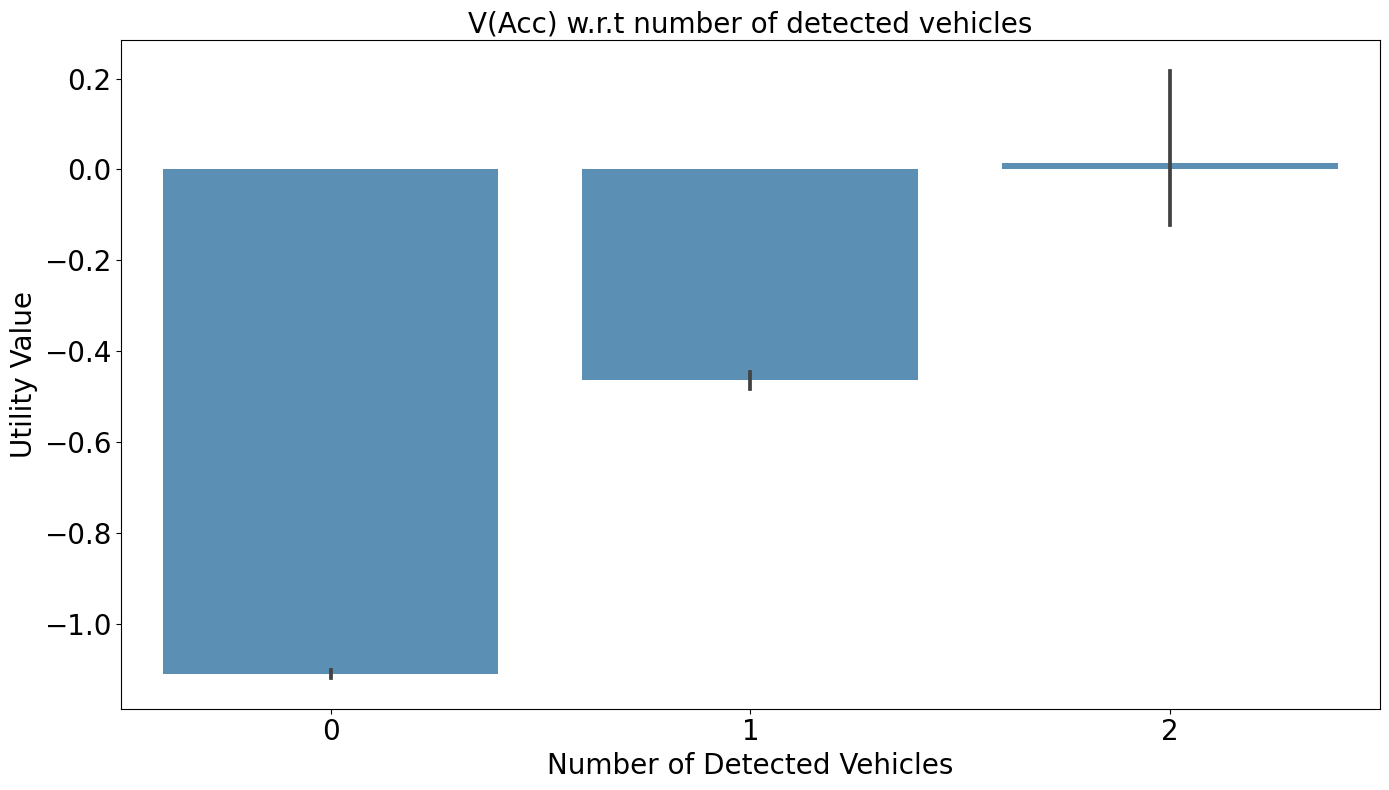

In [9]:
# Plotting graph for V(Acc) with respect to number of detected vehicles
plt.figure(figsize=(14, 8))
sns.barplot(data=filtered_df, x='num_of_det_vehicles', y='V_acc', color='#1f77b4', alpha=0.8)
plt.title("V(Acc) w.r.t number of detected vehicles", fontsize=20)
plt.ylabel("Utility Value", fontsize=20)
plt.xlabel("Number of Detected Vehicles", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(False)
plt.tight_layout()
plt.show()

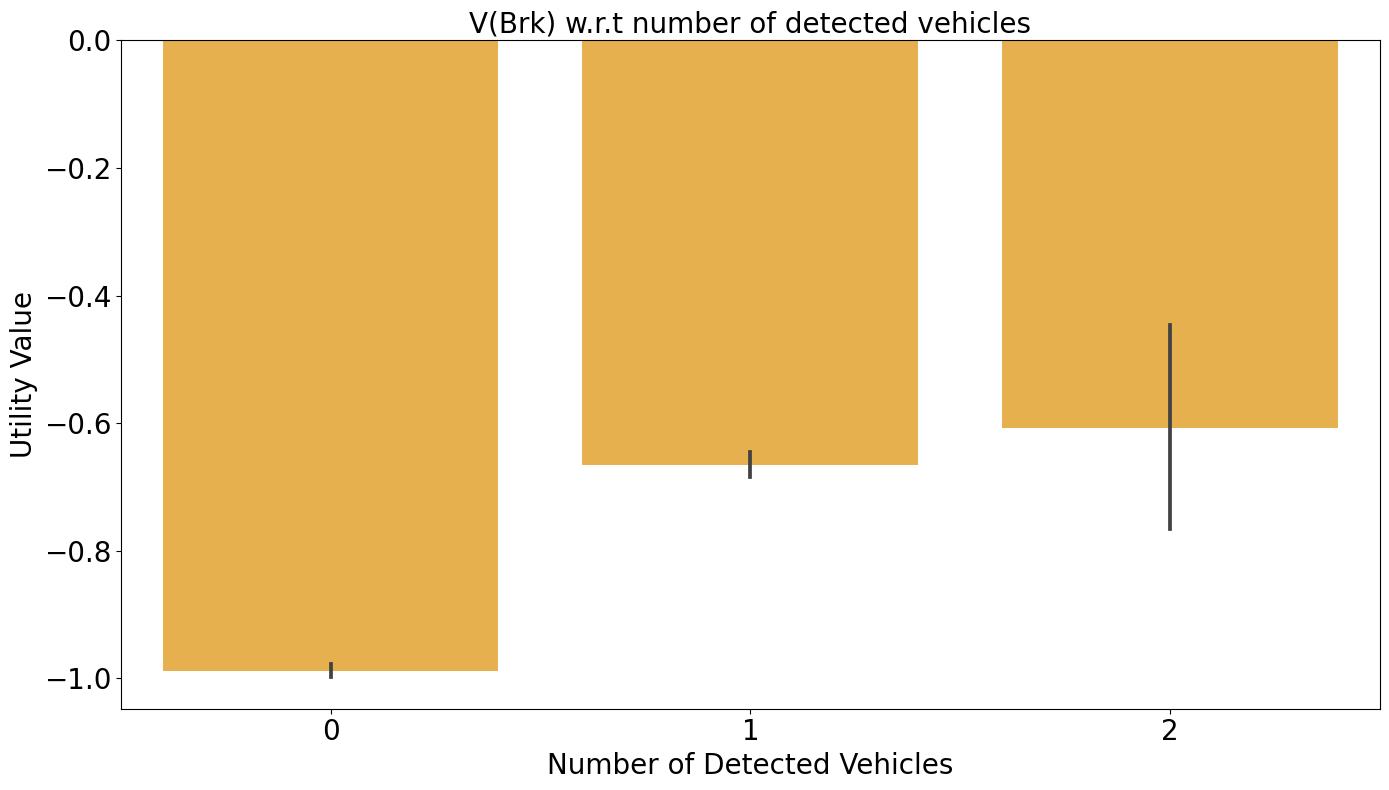

In [10]:
# Plotting graph for V(Brk) with respect to number of detected vehicles
plt.figure(figsize=(14, 8))
sns.barplot(data=filtered_df, x='num_of_det_vehicles', y='V_brk', color='orange', alpha=0.8)
plt.title("V(Brk) w.r.t number of detected vehicles", fontsize=20)
plt.ylabel("Utility Value", fontsize=20)
plt.xlabel("Number of Detected Vehicles", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

In [11]:
# Compute d_ahead
filtered_df['d_ahead'] = filtered_df['dist_ahead'] * filtered_df['veh_flag']

# Define linestyles and colors for plotting
linestyles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

C:\Users\Aashish\AppData\Local\Temp\ipykernel_49396\3017104892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['d_ahead'] = filtered_df['dist_ahead'] * filtered_df['veh_flag']


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


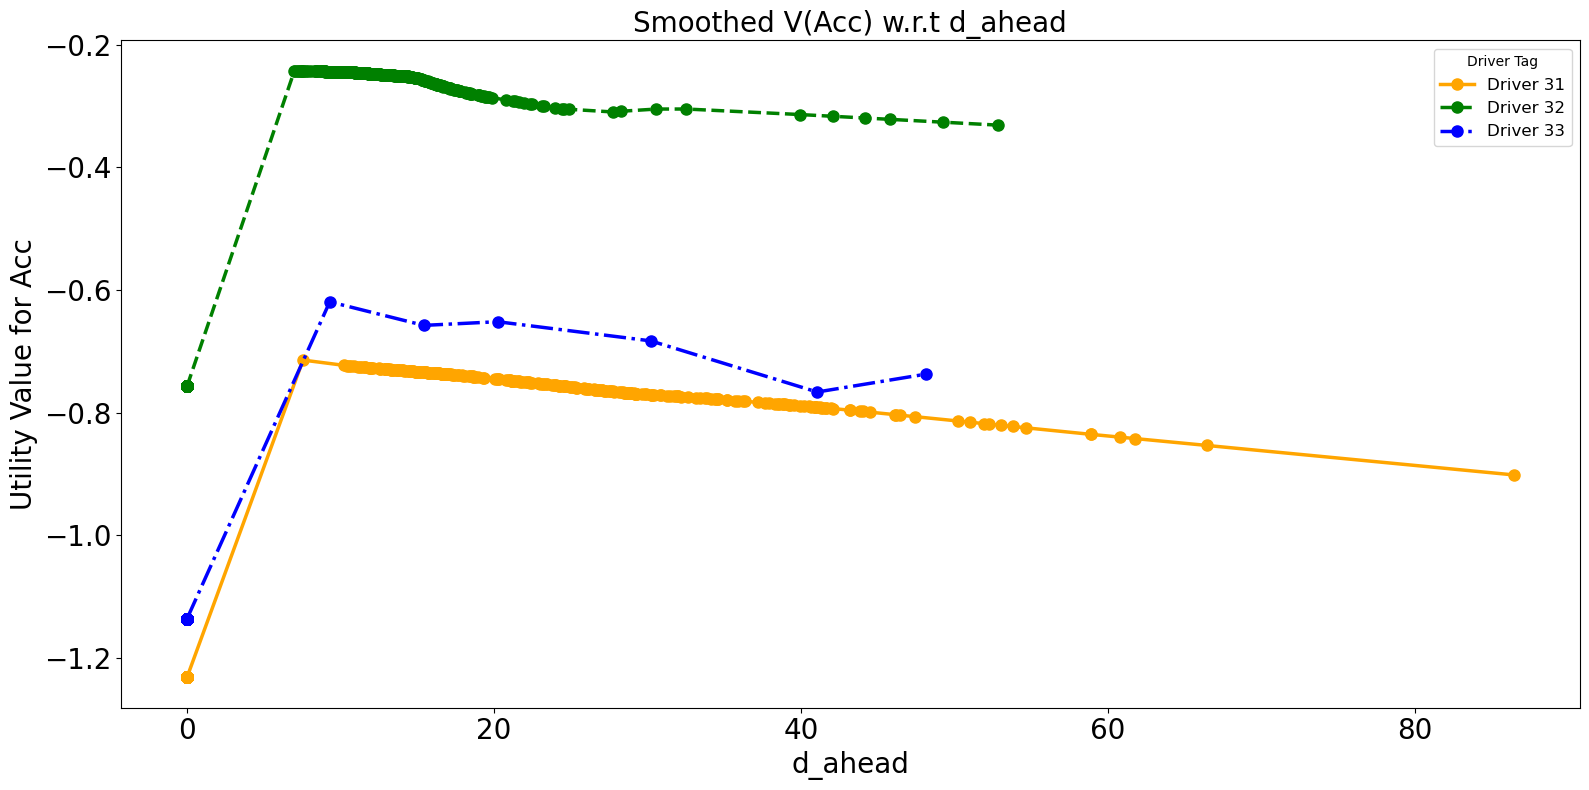

In [12]:
# Importing necessary module
import statsmodels.api as sm

colors_acc_brk = ['orange', 'green', 'blue']

plt.figure(figsize=(16, 8))

# Plotting smoothed curve for each driver tag
for i, driver in enumerate(sorted(filtered_df['driver_tag'].unique())):
    subset_df = filtered_df[filtered_df['driver_tag'] == driver].sort_values(by='d_ahead')
    lowess = sm.nonparametric.lowess(subset_df['V_acc'], subset_df['d_ahead'], frac=0.3)
    plt.plot(lowess[:, 0], lowess[:, 1], label=f'Driver {driver}', linestyle=linestyles[i % len(linestyles)], color=colors_acc_brk[i % len(colors_acc_brk)], linewidth=2.5, markersize=8, marker='o')

plt.title("Smoothed V(Acc) w.r.t d_ahead", fontsize=20)
plt.ylabel("Utility Value for Acc", fontsize=20)
plt.xlabel("d_ahead", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title='Driver Tag', fontsize='large')
plt.tight_layout()
plt.show()

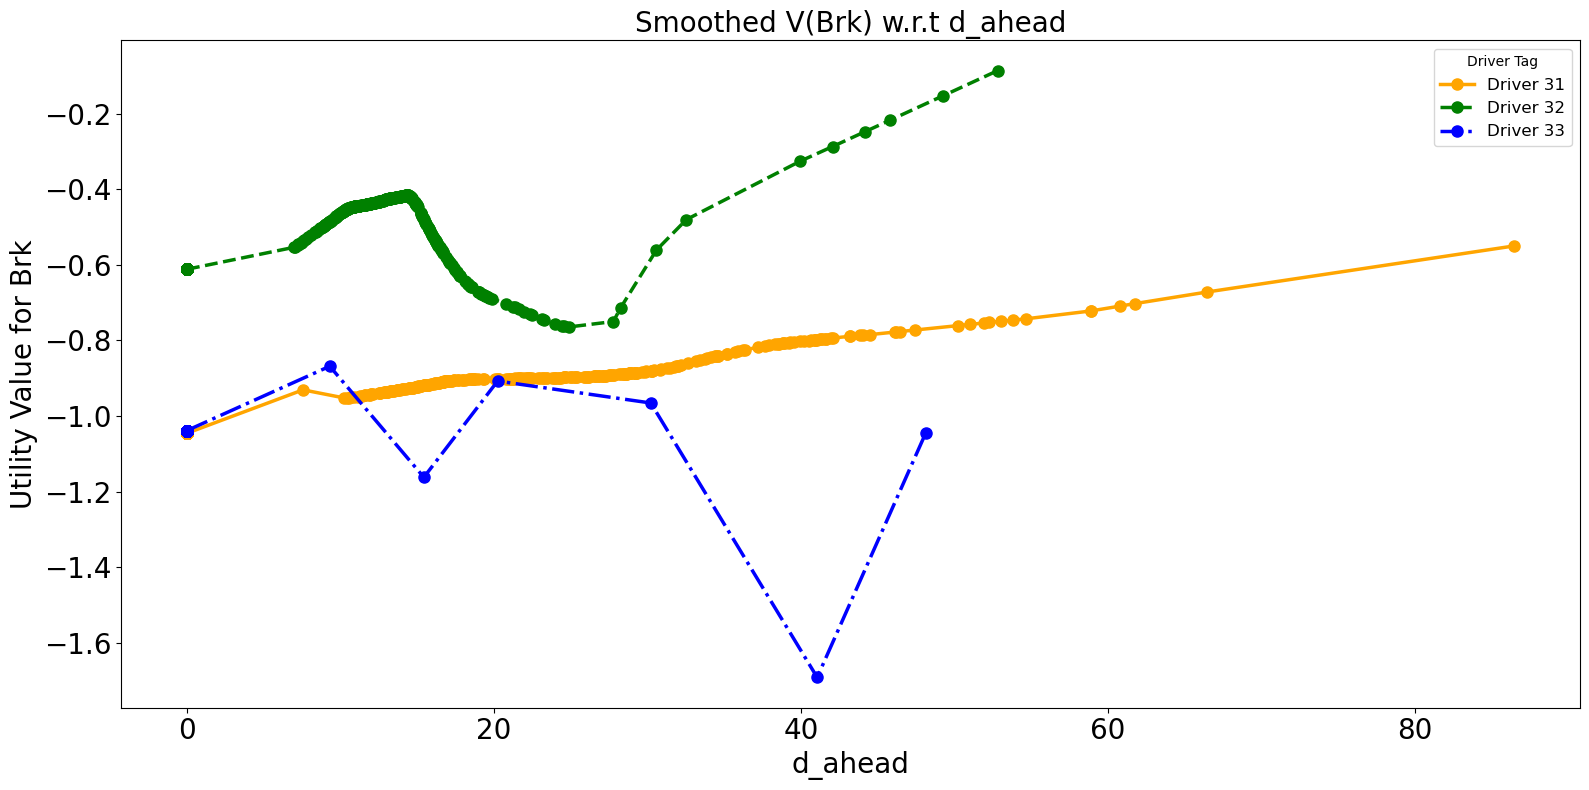

In [13]:
# Plotting smoothed curve for V(Brk)
plt.figure(figsize=(16, 8))
for i, driver in enumerate(sorted(filtered_df['driver_tag'].unique())):
    subset_df = filtered_df[filtered_df['driver_tag'] == driver].sort_values(by='d_ahead')
    lowess = sm.nonparametric.lowess(subset_df['V_brk'], subset_df['d_ahead'], frac=0.3)
    plt.plot(lowess[:, 0], lowess[:, 1], label=f'Driver {driver}', linestyle=linestyles[i % len(linestyles)], color=colors_acc_brk[i % len(colors_acc_brk)], linewidth=2.5, markersize=8, marker='o')

plt.title("Smoothed V(Brk) w.r.t d_ahead", fontsize=20)
plt.ylabel("Utility Value for Brk", fontsize=20)
plt.xlabel("d_ahead", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title='Driver Tag', fontsize='large')
plt.tight_layout()
plt.show()

In [14]:
lag_df = data_df

In [15]:
# Extracting unique values of num_of_det_vehicles for plotting
unique_nodv_values = lag_df['num_of_det_vehicles'].unique()

In [16]:
# Coefficient and t-ratio values
coefficients = {
    'b_lag_1': 0.9187,
    'b_lag_2': -0.1094,
    'b_lag_3': 0.1459,
    'b_lag_4': 0.0777,
    'nodv_lag_acc1': -0.1679,
    'nodv_lag_acc2': 0.3945,
    'nodv_lag_acc3': -0.8667,
    'nodv_lag_acc4': 0.6347,
    'nodv_lag_brk1': 0.5999,
    'nodv_lag_brk2': -0.2802,
    'nodv_lag_brk3': -0.3653,
    'nodv_lag_brk4': 0.3178
}

t_ratios = {
    'b_lag_1': 22.67,
    'b_lag_2': -2.49,
    'b_lag_3': 3.35,
    'b_lag_4': 1.82,
    'nodv_lag_acc1': -0.60,
    'nodv_lag_acc2': 1.41,
    'nodv_lag_acc3': -3.07,
    'nodv_lag_acc4': 2.90,
    'nodv_lag_brk1': 2.15,
    'nodv_lag_brk2': -1.00,
    'nodv_lag_brk3': -1.28,
    'nodv_lag_brk4': 1.45
}

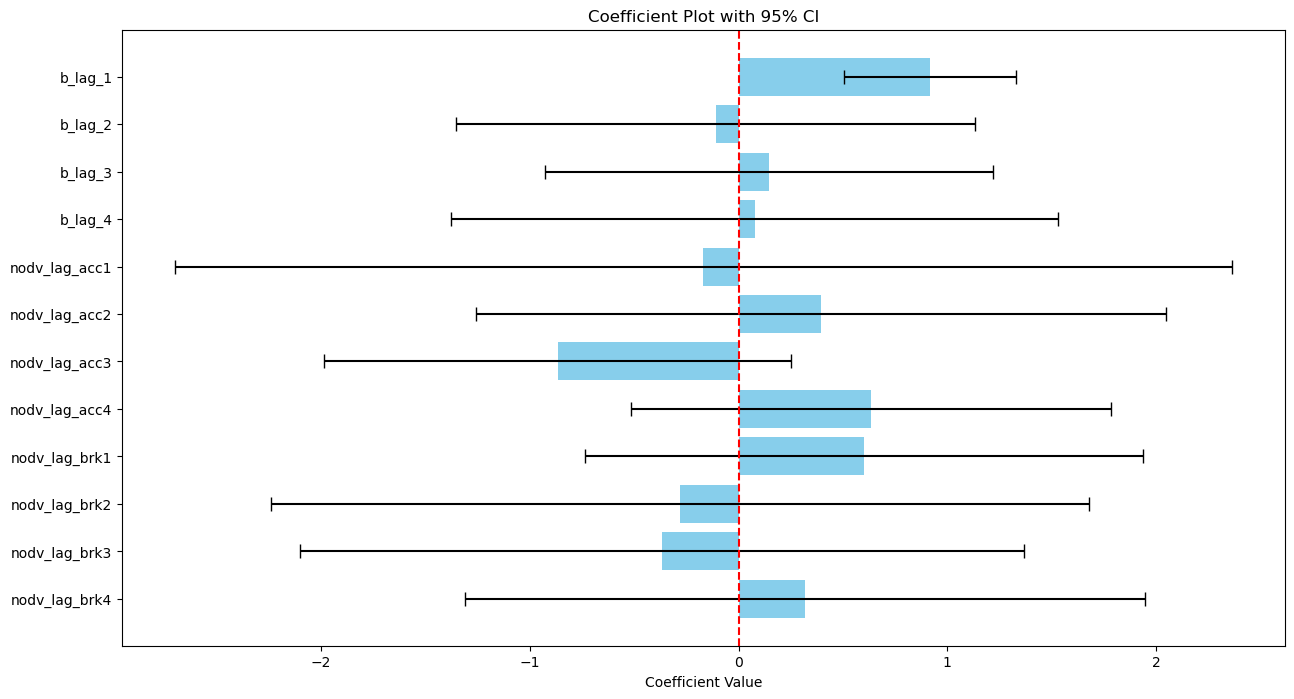

In [17]:
# Coefficient Plot
plt.figure(figsize=(15,8))
variables = list(coefficients.keys())
values = list(coefficients.values())
error = [1.96 / np.sqrt(abs(t)) for t in t_ratios.values()]  # Using 1.96 for 95% CI

plt.barh(variables, values, xerr=error, color='skyblue', align='center', capsize=5)
plt.xlabel('Coefficient Value')
plt.title('Coefficient Plot with 95% CI')
plt.axvline(x=0, color='red', linestyle='--')
plt.gca().invert_yaxis()
plt.show()

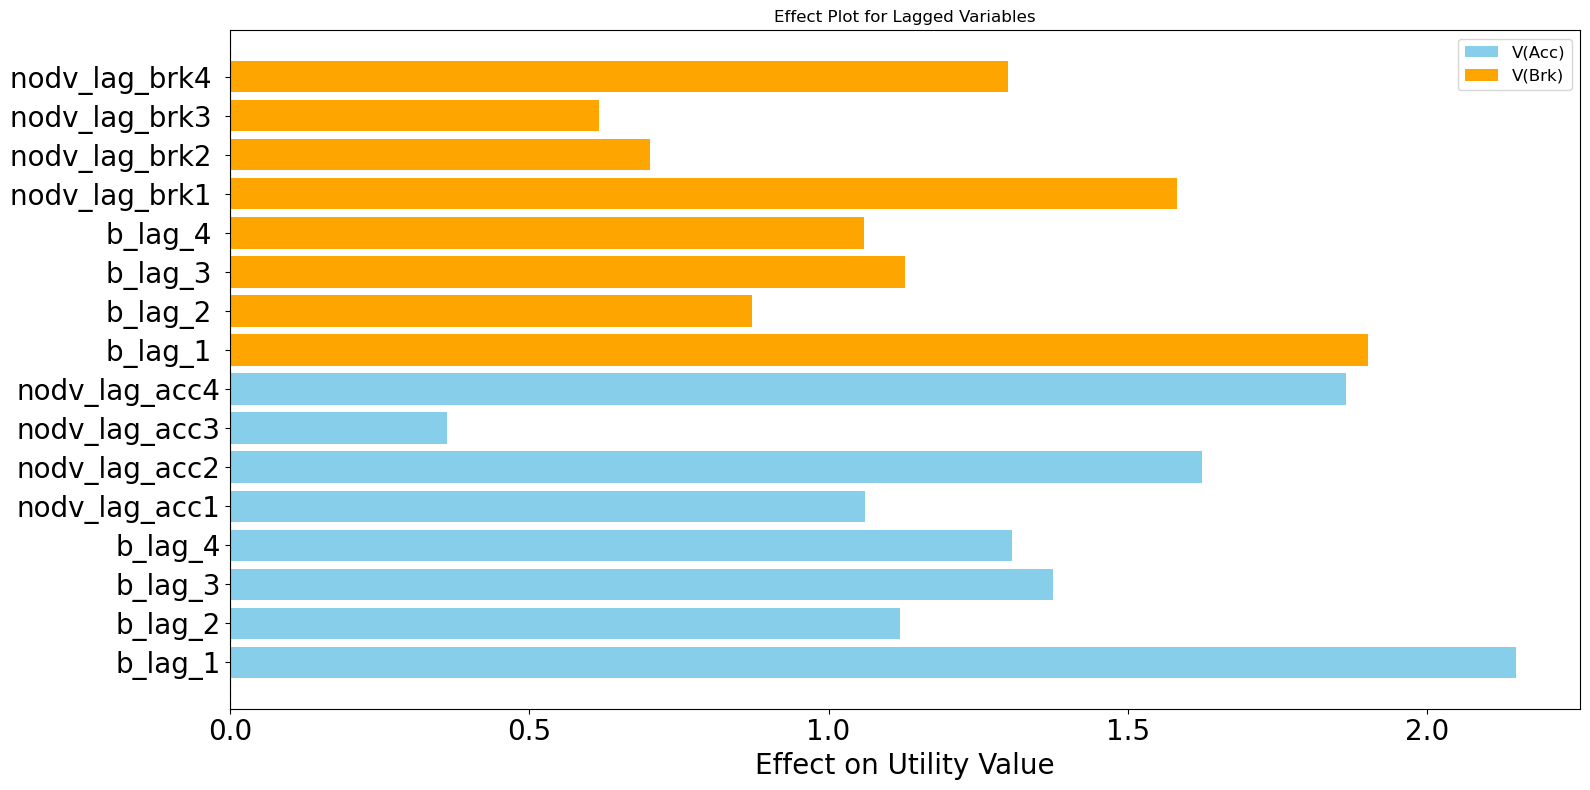

In [18]:
# Re-defining the necessary dictionaries

coefficients = {
    'b_lag_1': 0.9187,
    'b_lag_2': -0.1094,
    'b_lag_3': 0.1459,
    'b_lag_4': 0.0777,
    'nodv_lag_acc1': -0.1679,
    'nodv_lag_acc2': 0.3945,
    'nodv_lag_acc3': -0.8667,
    'nodv_lag_acc4': 0.6347,
    'nodv_lag_brk1': 0.5999,
    'nodv_lag_brk2': -0.2802,
    'nodv_lag_brk3': -0.3653,
    'nodv_lag_brk4': 0.3178
}

# Coefficients for asc_acc and asc_brk
asc_acc = -1.2296
asc_brk = -0.9823

# Splitting the coefficients dictionary into coeff_acc and coeff_brk considering both nodv_lag and b_lag
coeff_acc = {key: value for key, value in coefficients.items() if 'acc' in key or 'b_lag' in key}
coeff_brk = {key: value for key, value in coefficients.items() if 'brk' in key or 'b_lag' in key}

# Calculate effect for each lagged variable on Acc and Brk
effect_acc = {key: value - asc_acc for key, value in coeff_acc.items()}
effect_brk = {key: value - asc_brk for key, value in coeff_brk.items()}

# Plotting the Effect Plot
plt.figure(figsize=(16,8))

# Plotting for Acc
variables_acc = list(effect_acc.keys())
values_acc = list(effect_acc.values())
plt.barh(variables_acc, values_acc, align='center', color='skyblue', label='V(Acc)')

# Plotting for Brk (shifted for visualization)
variables_brk = [var + ' ' for var in effect_brk.keys()]
values_brk = list(effect_brk.values())
plt.barh(variables_brk, values_brk, align='center', color='orange', label='V(Brk)')

plt.xlabel('Effect on Utility Value',fontsize=20)
plt.title('Effect Plot for Lagged Variables')
plt.axvline(x=0, color='red', linestyle='--')
plt.legend(fontsize='large')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

In [19]:
# Reloading the data and recreating the filtered_df and coefficients dictionary
data_df = pd.read_csv("laggedchoice_data_car_driver_choices_cleaned.csv")

# Compute the time_to_impact
data_df['time_to_impact'] = (data_df['dist_ahead'] / data_df['gps_speed']) * data_df['veh_flag']

# Filter data for driver tags 31, 32, and 33
filtered_df = data_df[data_df['driver_tag'].isin([31, 32, 33])]

# Recomputing the differences (lags) for num_of_det_vehicles in lag_df
lag_df = filtered_df.copy()
lag_df['num_of_det_vehicles_diff1'] = lag_df.groupby('driver_tag')['num_of_det_vehicles'].diff(1)
lag_df['num_of_det_vehicles_diff2'] = lag_df.groupby('driver_tag')['num_of_det_vehicles'].diff(2)
lag_df['num_of_det_vehicles_diff3'] = lag_df.groupby('driver_tag')['num_of_det_vehicles'].diff(3)
lag_df['num_of_det_vehicles_diff4'] = lag_df.groupby('driver_tag')['num_of_det_vehicles'].diff(4)

In [20]:
# Coefficients dictionary (previously provided)
coefficients = {
    'asc_acc': -1.2296,
    'asc_brk': -0.9823,
    'nodv_acc': 0.5427,
    'nodv_brk': 0.1425,
    'dist_acc': 0.0020,
    'dist_brk': 0.0631,
    'time_to_impact_acc': -0.4476,
    'time_to_impact_brk': -6.0091,
    'is_drowsy_acc': 0.0955,
    'is_drowsy_brk': 0.0071,
    'is_aggressive_acc': 0.4745,
    'is_aggressive_brk': 0.4339,
    'b_lag_1': 0.9187,
    'b_lag_2': -0.1094,
    'b_lag_3': 0.1459,
    'b_lag_4': 0.0777,
    'nodv_lag_acc1': -0.1679,
    'nodv_lag_acc2': 0.3945,
    'nodv_lag_acc3': -0.8667,
    'nodv_lag_acc4': 0.6347,
    'nodv_lag_brk1': 0.5999,
    'nodv_lag_brk2': -0.2802,
    'nodv_lag_brk3': -0.3653,
    'nodv_lag_brk4': 0.3178,
    'dist_lag_acc1': 0.0013,
    'dist_lag_acc2': -0.0076,
    'dist_lag_acc3': 0.0173,
    'dist_lag_acc4': -0.0105,
    'dist_lag_brk1': -0.0004,
    'dist_lag_brk2': 0.0006,
    'dist_lag_brk3': 0.0063,
    'dist_lag_brk4': -0.0063
}


# Define the correct mapping of coefficients for the lagged variables
coeff_mapping_acc = {
    'num_of_det_vehicles_diff1': 'nodv_lag_acc1',
    'num_of_det_vehicles_diff2': 'nodv_lag_acc2',
    'num_of_det_vehicles_diff3': 'nodv_lag_acc3',
    'num_of_det_vehicles_diff4': 'nodv_lag_acc4'
}

coeff_mapping_brk = {
    'num_of_det_vehicles_diff1': 'nodv_lag_brk1',
    'num_of_det_vehicles_diff2': 'nodv_lag_brk2',
    'num_of_det_vehicles_diff3': 'nodv_lag_brk3',
    'num_of_det_vehicles_diff4': 'nodv_lag_brk4'
}

In [21]:
# Add this line to define nodv_lag_vars
nodv_lag_vars = ['num_of_det_vehicles_diff1', 'num_of_det_vehicles_diff2', 'num_of_det_vehicles_diff3', 'num_of_det_vehicles_diff4']

In [22]:
# Calculating the interaction effects for Acc and Brk
interaction_effects_acc = {}
for lag_var in nodv_lag_vars:
    interaction_effects_acc[lag_var] = lag_df.groupby('num_of_det_vehicles')[lag_var].mean() * coefficients[coeff_mapping_acc[lag_var]]

interaction_effects_brk = {}
for lag_var in nodv_lag_vars:
    interaction_effects_brk[lag_var] = lag_df.groupby('num_of_det_vehicles')[lag_var].mean() * coefficients[coeff_mapping_brk[lag_var]]

interaction_effects_acc, interaction_effects_brk

({'num_of_det_vehicles_diff1': num_of_det_vehicles
  0    0.004467
  1   -0.004726
  2   -0.071957
  Name: num_of_det_vehicles_diff1, dtype: float64,
  'num_of_det_vehicles_diff2': num_of_det_vehicles
  0   -0.017693
  1    0.017559
  2    0.338143
  Name: num_of_det_vehicles_diff2, dtype: float64,
  'num_of_det_vehicles_diff3': num_of_det_vehicles
  0    0.049496
  1   -0.046361
  2   -1.114329
  Name: num_of_det_vehicles_diff3, dtype: float64,
  'num_of_det_vehicles_diff4': num_of_det_vehicles
  0   -0.044839
  1    0.042502
  2    0.906714
  Name: num_of_det_vehicles_diff4, dtype: float64},
 {'num_of_det_vehicles_diff1': num_of_det_vehicles
  0   -0.015959
  1    0.016886
  2    0.257100
  Name: num_of_det_vehicles_diff1, dtype: float64,
  'num_of_det_vehicles_diff2': num_of_det_vehicles
  0    0.012567
  1   -0.012472
  2   -0.240171
  Name: num_of_det_vehicles_diff2, dtype: float64,
  'num_of_det_vehicles_diff3': num_of_det_vehicles
  0    0.020862
  1   -0.019541
  2   -0.469671


In [ ]:
# Faceted Line Plots for each lagged variable's interaction effect with num_of_det_vehicles

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,12),sharex=True, sharey=True)

# Flatten axes for easier iteration
axes = axes.ravel()

# Plotting the interaction effects for each lagged variable
for idx, lag_var in enumerate(nodv_lag_vars):
    axes[idx].plot(interaction_effects_acc[lag_var].index, interaction_effects_acc[lag_var], label='V(Acc)', linestyle='-', marker='o', color='skyblue')
    axes[idx].plot(interaction_effects_brk[lag_var].index, interaction_effects_brk[lag_var], label='V(Brk)', linestyle='--', marker='o', color='salmon')
    axes[idx].set_title(f'Interaction Effect: {lag_var}')
    axes[idx].legend()
    axes[idx].grid(True, which='both', linestyle='--', linewidth=0.5)

fig.suptitle('Faceted Line Plots: num_of_det_vehicles vs. Each Lagged Variable', fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.xlabel('num_of_det_vehicles',fontsize=18)
plt.ylabel('Interaction Effect on Utility Value',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()